#  Reference template based classifier 
## Case 1: Mean vector as reference template for a class

In [1]:
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler

# Load datasets (space-separated values)
train_data = np.loadtxt(r'C:\Users\raksh\IML-project-dec-2024\classification_datasets\overlapping\combined_dataset_train.txt', delimiter=' ')
test_data = np.loadtxt(r'C:\Users\raksh\IML-project-dec-2024\classification_datasets\overlapping\combined_dataset_test.txt', delimiter=' ')

# Separate features and labels
X_train = train_data[:, :-1]  # First two columns (features)
y_train = train_data[:, -1].astype(int)   # Last column (labels), ensure integers
X_test = test_data[:, :-1]    # First two columns (features)
y_test = test_data[:, -1].astype(int)     # Last column (labels), ensure integers

# Normalize features (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Calculate mean vectors for each class (1, 2, 3, 4)
class_means = {}
for class_label in np.unique(y_train):
    class_data = X_train[y_train == class_label]
    class_means[class_label] = np.mean(class_data, axis=0)

# Debug: Print class means
print("Class means:")
for class_label, mean_vector in class_means.items():
    print(f"Class {class_label}: {mean_vector}")

# Define the classifier function
def classify(X, class_means):
    # Compute distances from each sample to each class mean vector
    distances = cdist(X, np.array(list(class_means.values())))

    # Assign class label based on closest mean (class with minimum distance)
    predictions = np.argmin(distances, axis=1) + 1  # Add 1 to map to correct class label (1, 2, 3, 4)
    
    return predictions

# Classify test data
y_pred = classify(X_test, class_means)

# Evaluate accuracy
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')


Class means:
Class 1: [-0.66322881 -0.74856738]
Class 2: [1.09671096 0.86261423]
Class 3: [ 0.39617119 -0.93710876]
Class 4: [-0.82965335  0.82306191]
Accuracy: 82.25%


### Decision plot for the training data

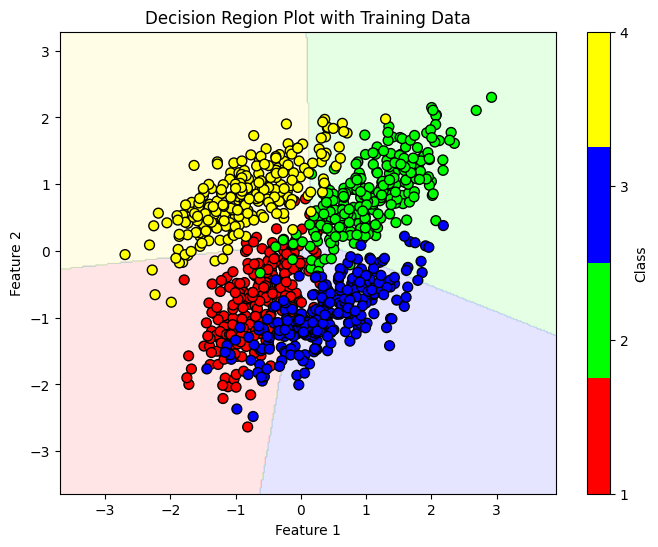

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler

# Create a mesh grid for plotting decision regions
h = 0.02  # Step size in the mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Classify each point in the mesh grid
Z = classify(np.c_[xx.ravel(), yy.ravel()], class_means)
Z = Z.reshape(xx.shape)

# Create the plot
plt.figure(figsize=(8, 6))

# Plot decision regions
cmap_background = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFFAAA'])
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_background)

# Overlay the training data points
cmap_points = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FFFF00'])
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_points, edgecolor='k', s=50)

# Add color bar for the classes
plt.colorbar(scatter, ticks=[1, 2, 3, 4], label='Class')

# Set plot labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Region Plot with Training Data')

# Show the plot
plt.show()



### Decision plot with testing data

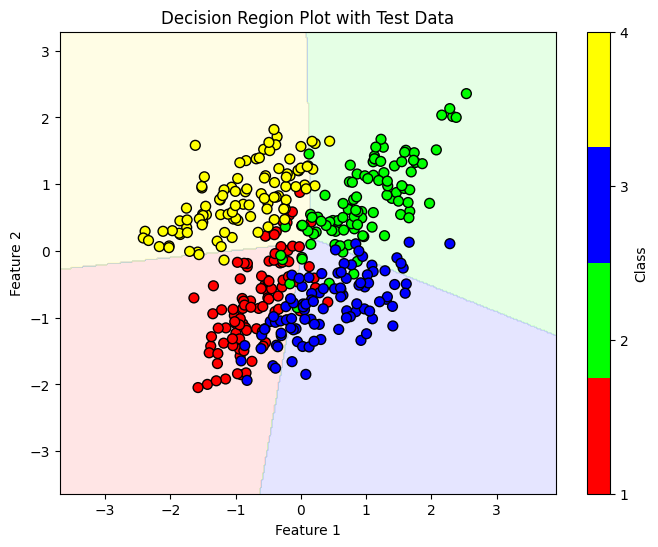

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler


# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Calculate mean vectors for each class (1, 2, 3, 4)
class_means = {}
for class_label in np.unique(y_train):
    class_data = X_train[y_train == class_label]
    class_means[class_label] = np.mean(class_data, axis=0)

# Define the classifier function
def classify(X, class_means):
    distances = cdist(X, np.array(list(class_means.values())))
    predictions = np.argmin(distances, axis=1) + 1  # Map to correct class labels (1, 2, 3, 4)
    return predictions

# Create a mesh grid for plotting decision regions
h = 0.02  # Step size in the mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Classify each point in the mesh grid
Z = classify(np.c_[xx.ravel(), yy.ravel()], class_means)
Z = Z.reshape(xx.shape)

# Create the plot
plt.figure(figsize=(8, 6))

# Plot decision regions
cmap_background = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFFAAA'])
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_background)

# Overlay the test data points
cmap_points = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FFFF00'])
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_points, edgecolor='k', s=50)

# Add color bar for the classes
plt.colorbar(scatter, ticks=[1, 2, 3, 4], label='Class')

# Set plot labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Region Plot with Test Data')

# Show the plot
plt.show()

### Decision region plot for every pair of classes with the respective training data superimposed 

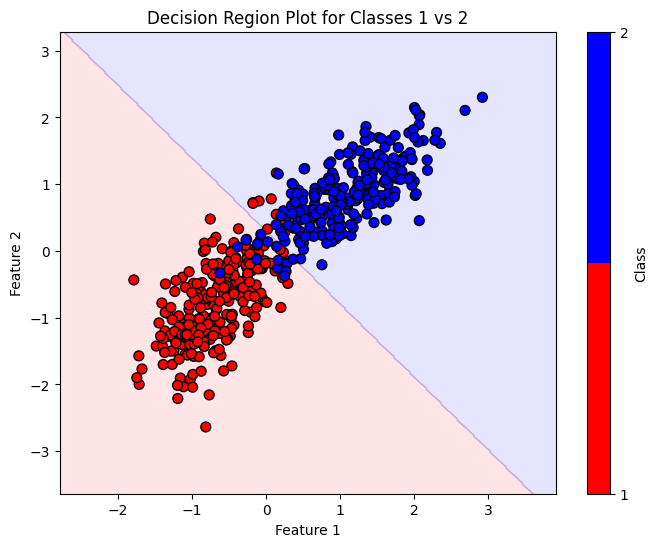

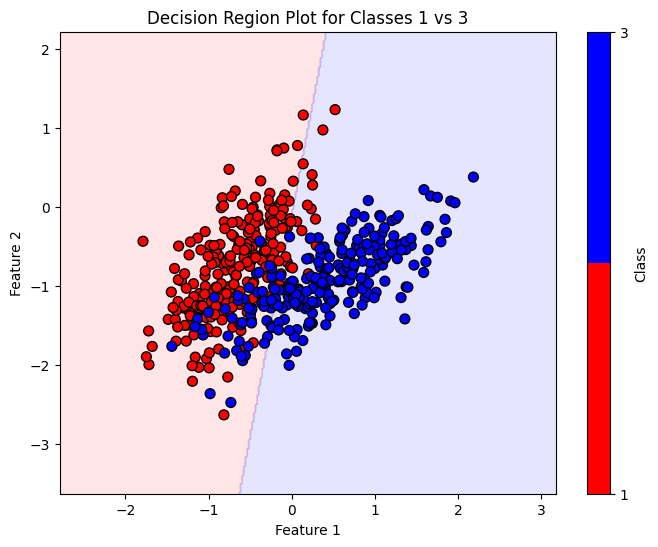

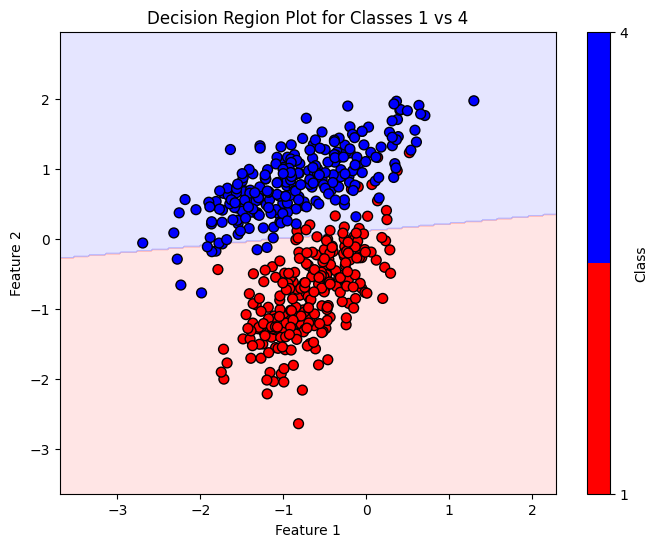

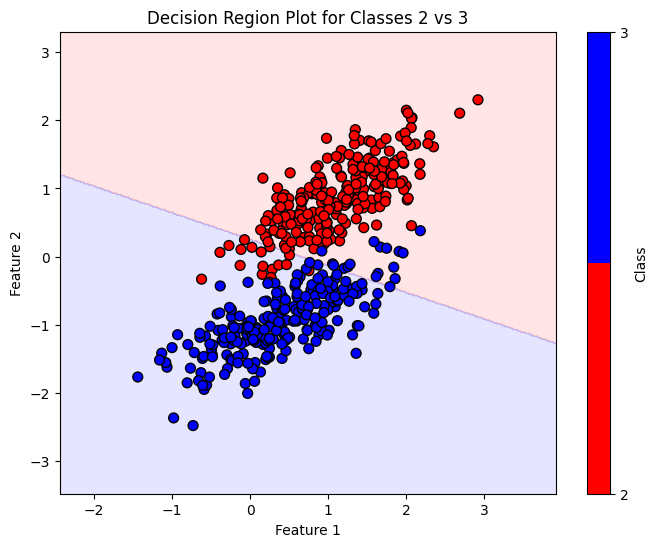

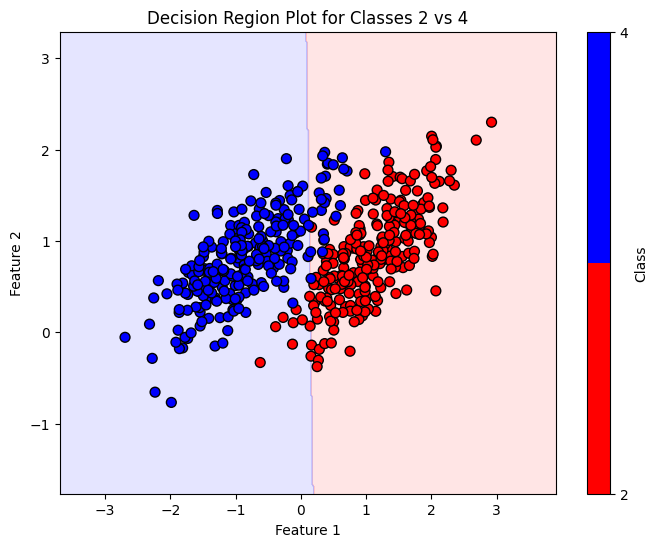

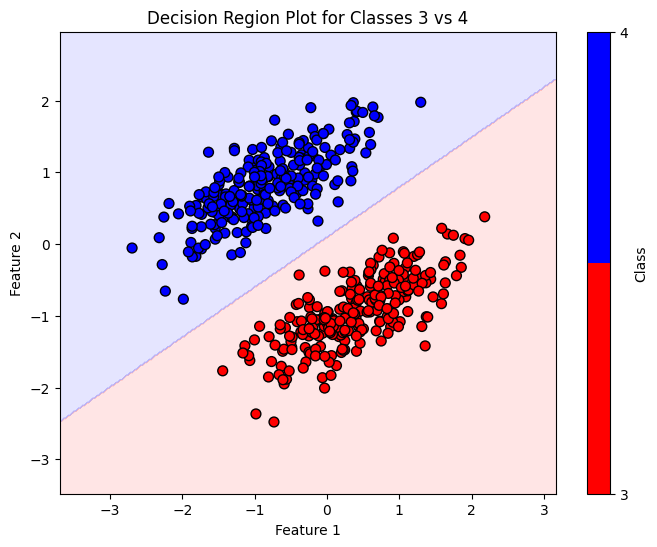

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
from itertools import combinations

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Calculate mean vectors for each class (1, 2, 3, 4)
class_means = {}
for class_label in np.unique(y_train):
    class_data = X_train[y_train == class_label]
    class_means[class_label] = np.mean(class_data, axis=0)

# Define the classifier function
def classify(X, class_means):
    distances = cdist(X, np.array(list(class_means.values())))
    predictions = np.argmin(distances, axis=1) + 1  # Map to correct class labels (1, 2, 3, 4)
    return predictions

# Function to plot decision regions for a pair of classes
def plot_pairwise_decision_regions(X_train, y_train, class_means, class_pair):
    # Filter the data for the selected pair of classes
    X_train_pair = X_train[np.isin(y_train, class_pair)]
    y_train_pair = y_train[np.isin(y_train, class_pair)]
    
    # Calculate decision boundaries for the pair of classes
    h = 0.02  # Step size in the mesh
    x_min, x_max = X_train_pair[:, 0].min() - 1, X_train_pair[:, 0].max() + 1
    y_min, y_max = X_train_pair[:, 1].min() - 1, X_train_pair[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Classify each point in the mesh grid
    Z = classify(np.c_[xx.ravel(), yy.ravel()], {k: class_means[k] for k in class_pair})
    Z = Z.reshape(xx.shape)
    
    # Create the plot
    plt.figure(figsize=(8, 6))
    
    # Plot decision regions
    cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_background)
    
    # Overlay the training data points for the pair of classes
    scatter = plt.scatter(X_train_pair[:, 0], X_train_pair[:, 1], c=y_train_pair, cmap=ListedColormap(['#FF0000', '#0000FF']), edgecolor='k', s=50)
    
    # Add color bar for the classes
    plt.colorbar(scatter, ticks=[class_pair[0], class_pair[1]], label='Class')
    
    # Set plot labels and title
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Region Plot for Classes {class_pair[0]} vs {class_pair[1]}')

    # Show the plot
    plt.show()

# Generate decision region plots for every pair of classes (combinations of 2 classes)
class_combinations = list(combinations([1, 2, 3, 4], 2))

for class_pair in class_combinations:
    plot_pairwise_decision_regions(X_train, y_train, class_means, class_pair)


### Evaluation Metrics

In [5]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Calculate mean vectors for each class (1, 2, 3, 4)
class_means = {}
for class_label in np.unique(y_train):
    class_data = X_train[y_train == class_label]
    class_means[class_label] = np.mean(class_data, axis=0)

# Define the classifier function
def classify(X, class_means):
    distances = cdist(X, np.array(list(class_means.values())))
    predictions = np.argmin(distances, axis=1) + 1  # Map to correct class labels (1, 2, 3, 4)
    return predictions

# Get predictions for the test data
y_pred = classify(X_test, class_means)

# Classification accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision, Recall, F-measure for each class
precision = precision_score(y_test, y_pred, average=None, labels=[1, 2, 3, 4])
recall = recall_score(y_test, y_pred, average=None, labels=[1, 2, 3, 4])
f_measure = f1_score(y_test, y_pred, average=None, labels=[1, 2, 3, 4])

# Mean precision, recall, F-measure
mean_precision = np.mean(precision)
mean_recall = np.mean(recall)
mean_f_measure = np.mean(f_measure)

# Create a DataFrame for tabular representation
metrics = {
    "Class": [1, 2, 3, 4],
    "Precision": precision,
    "Recall": recall,
    "F-measure": f_measure
}

df = pd.DataFrame(metrics)
df.loc["Mean"] = ["Mean", mean_precision, mean_recall, mean_f_measure]

# Print the table
print(f"Classification Accuracy: {accuracy * 100:.2f}%")
print("\nMetrics per Class:")
print(df.to_string(index=False))


Classification Accuracy: 82.25%

Metrics per Class:
Class  Precision  Recall  F-measure
    1   0.750000  0.8100   0.778846
    2   0.858586  0.8500   0.854271
    3   0.823529  0.7000   0.756757
    4   0.861111  0.9300   0.894231
 Mean   0.823307  0.8225   0.821026


### Confusion matrix

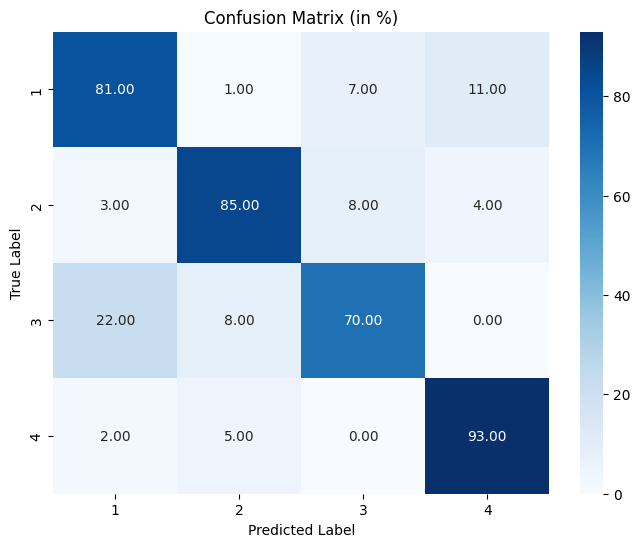

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[1, 2, 3, 4])

# Normalize to percentages
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="Blues", xticklabels=[1, 2, 3, 4], yticklabels=[1, 2, 3, 4])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (in %)")
plt.show()
